# DSS for Lister-Mukamel Neuron and Glia
## Author: Jack Duryea
## Date: 31 October 2018 (Happy Halloween!)
This is my first attempt at using DSS to find DMRs. The idea is to try to find DMRS using
read-level methylation data before and after imputing values using CpG Net. I'm comparing Neuron and Glia tissue samples from chromosome 19 since it's usually a pretty interesting chromosome, and I'm only looking at 100bp bins with 2 CpGs. No imputation has been performed so far, and I've set no coverage requirements (since DSS does this for us).

## Step 1) get some R packages

In [1]:
source("https://bioconductor.org/biocLite.R")
biocLite("DSS")

Bioconductor version 3.4 (BiocInstaller 1.24.0), ?biocLite for help
A new version of Bioconductor is available after installing the most recent
  version of R; see http://bioconductor.org/install
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.4 (BiocInstaller 1.24.0), R 3.3.2 (2016-10-31).
Installing package(s) ‘DSS’
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Old packages: 'assertthat', 'backports', 'BH', 'bindr', 'bindrcpp', 'boot',
  'broom', 'car', 'caret', 'caTools', 'cluster', 'colorspace', 'crayon',
  'curl', 'data.table', 'DBI', 'digest', 'dplyr', 'evaluate', 'forcats',
  'foreach', 'foreign', 'formatR', 'ggplot2', 'gistr', 'glmnet', 'glue',
  'haven', 'hexbin', 'highr', 'hms', 'htmltools', 'htmlwidgets', 'httpuv',
  'httr', 'IRdisplay', 'iterators', 'jsonlite', 'knitr', 'lattice', 'lazyeval',
  'lme4', 'lubridate', 'maps', 'markdown', 'MASS', 'Matrix', 'mgcv', 'mime',
  'ModelMetrics', 'modelr', 'munsell', 'nloptr', 'openssl', 'pac

## Step 2) More R requirements

In [3]:
library(DSS)
require(bsseq)

## Step 3) Inspect our data to ensure proper format

In [22]:
glia = read.table("lm_glia_2cpgs_dss_data_chr19.txt",header=TRUE)
head(glia)

chr,pos,N,X
chr19,3002065,1,0
chr19,3002077,1,1
chr19,3033301,1,1
chr19,3033336,1,1
chr19,3078947,21,12
chr19,3078966,28,15


In [21]:
# neuron
neurons = read.table("lm_neuron_2cpgs_dss_data_chr19.txt",header=TRUE)
head(neurons)

chr,pos,N,X
chr19,3078947,14,12
chr19,3078966,24,20
chr19,3079586,7,6
chr19,3079597,8,6
chr19,3079728,25,25
chr19,3079791,28,19


## Step 4) Load data into a BSobj

In [26]:
# Note: I'm only using 1000 CpGs for now

In [36]:
dat1.1 = glia
dat1.2 = neurons
BSobj <- makeBSseqData( list(dat1.1, dat1.2),  c("C1","C2") )#[1:1000,]

In [37]:
BSobj

An object of type 'BSseq' with
  145356 methylation loci
  2 samples
has not been smoothed

## Step 5) Run the test

In [38]:
dmlTest <- DMLtest(BSobj, group1=c("C1"), group2=c("C2"), smoothing=TRUE)

Smoothing ...
Estimating dispersion for each CpG site, this will take a while ...


# Step 6) Find DM loci

In [39]:
dmls <- callDML(dmlTest, p.threshold=0.001)
head(dmls)

,chr,pos,mu1,mu2,diff,diff.se,stat,phi1,phi2,pval,fdr,postprob.overThreshold
976,chr19,3483024,0.8726414,0.03516151,0.8374799,0.06586288,12.71551,0.03857786,0.05279895,0,0,1
977,chr19,3483100,0.8726414,0.03516151,0.8374799,0.05447745,15.37296,0.04630921,0.05077669,0,0,1
1052,chr19,3526884,0.9538020,0.28158909,0.6722129,0.06451397,10.41965,0.03743453,0.04769012,0,0,1
1055,chr19,3527603,0.8790525,0.06222751,0.8168250,0.05744569,14.21908,0.03655531,0.03986525,0,0,1
1056,chr19,3527635,0.8790525,0.06222751,0.8168250,0.05314345,15.37019,0.03660329,0.03904669,0,0,1
1853,chr19,3813434,0.8835782,0.11904927,0.7645289,0.06899284,11.08128,0.03944491,0.05975529,0,0,1


# Step 7) Find DMRs

In [40]:
dmrs <- callDMR(dmlTest, p.threshold=0.01)
head(dmrs)

,chr,start,end,length,nCG,meanMethy1,meanMethy2,diff.Methy,areaStat
9821,chr19,55744816,55750984,6169,34,0.6967527,0.2238610,0.4728917,226.7168
3338,chr19,23864417,23867874,3458,20,0.8444199,0.2074937,0.6369262,199.6396
10564,chr19,58815506,58817285,1780,20,0.8346257,0.3171109,0.5175147,155.3320
558,chr19,5944235,5946755,2521,24,0.5314585,0.9475062,-0.4160477,-152.1153
265,chr19,4714207,4718162,3956,18,0.8208137,0.2777972,0.5430165,127.2464
7320,chr19,43925436,43928647,3212,18,0.6920484,0.2069308,0.4851175,125.0107


In [41]:
nrow(dmrs)

[1] 3724

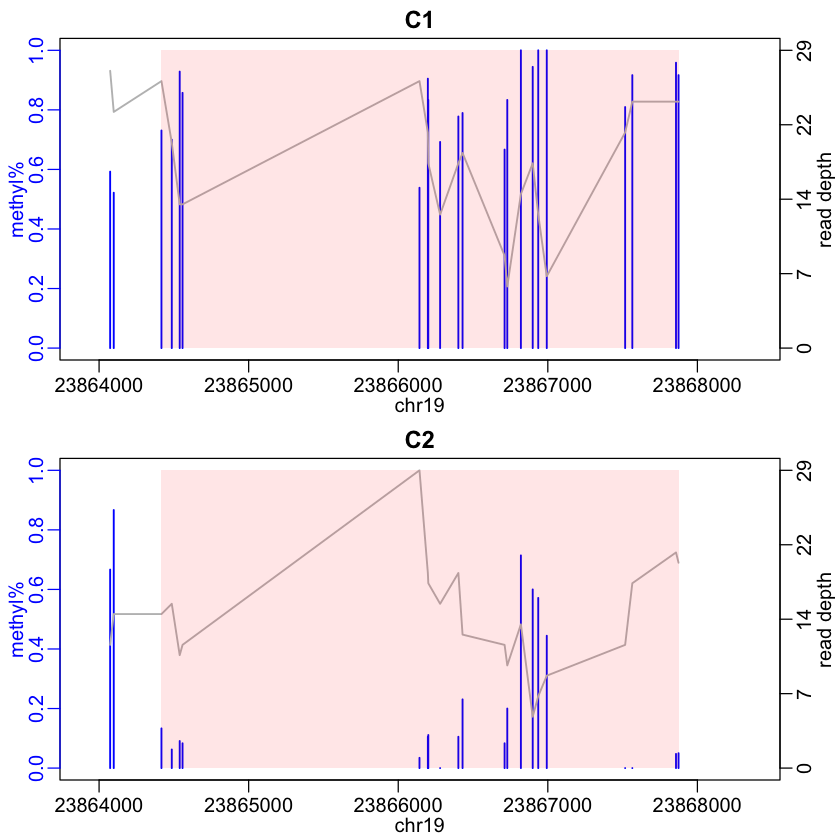

In [43]:
# Step 8) Visualize DMRS
showOneDMR(dmrs[2,], BSobj)